# EDA and exploring

## Imports

In [58]:
import pandas as pd
import numpy as np
import yfinance as yf

import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches


from google.colab import drive
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

## Loaing data set

In [14]:

df = yf.download('BTC-USD', start='2014-01-01', end='2024-04-25')

[*********************100%%**********************]  1 of 1 completed


In [15]:
df.shape

(3508, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3508 entries, 2014-09-17 to 2024-04-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3508 non-null   float64
 1   High       3508 non-null   float64
 2   Low        3508 non-null   float64
 3   Close      3508 non-null   float64
 4   Adj Close  3508 non-null   float64
 5   Volume     3508 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 191.8 KB


In [17]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495
2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853
2024-04-22,64935.632812,67233.960938,64548.179688,66837.679688,66837.679688,28282686673


In [18]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3.508000e+03
mean,15933.254635,16306.064941,15534.673681,15950.188877,15950.188877,1.713575e+10
std,17672.519010,18097.032105,17202.998523,17686.961557,17686.961557,1.928210e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1010.507523,1042.839996,985.658508,1012.985001,1012.985001,2.115403e+08
50%,8673.427246,8850.114746,8452.254883,8677.045898,8677.045898,1.278290e+10
75%,26811.966309,27172.519531,26422.905273,26823.031738,26823.031738,2.769496e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [19]:
df.drop(columns=['Adj Close'], inplace=True)

In [20]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


## Visualization

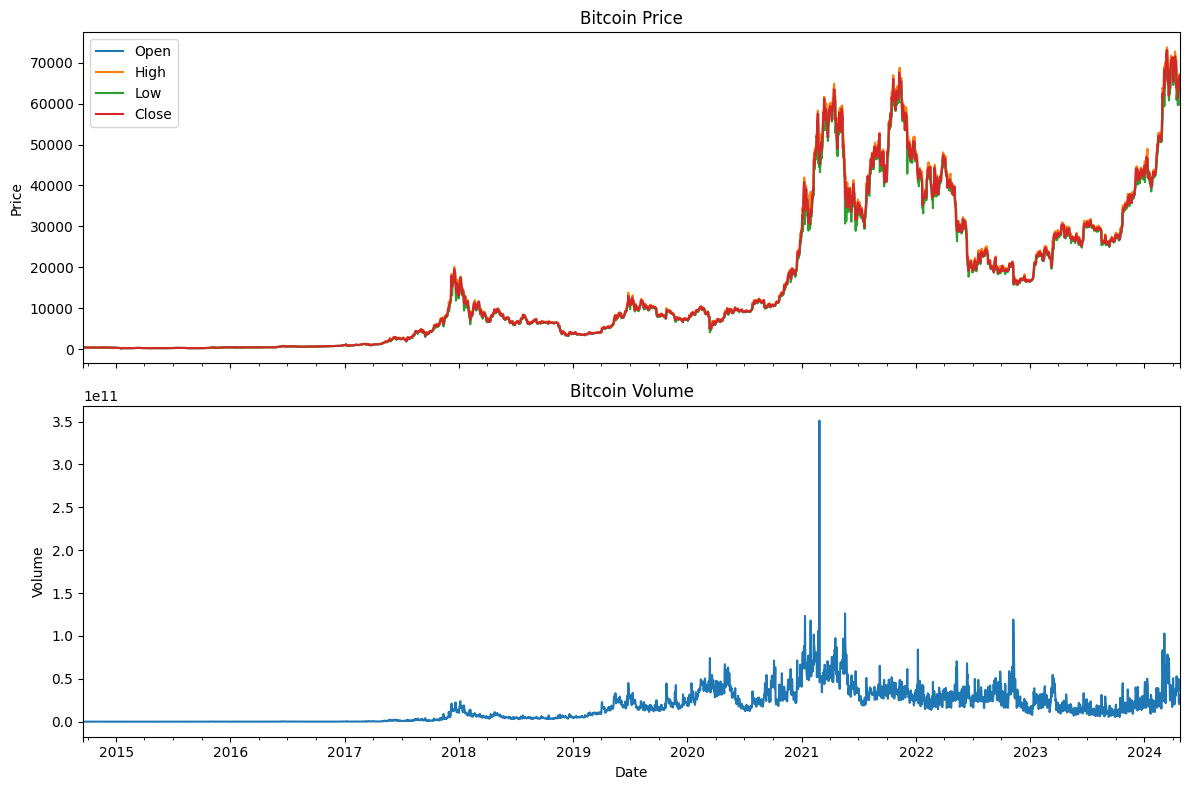

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot
df[['Open', 'High', 'Low', 'Close']].plot(ax=axs[0], title='Bitcoin Price')
axs[0].set_ylabel('Price')

# Plot Volume column
df['Volume'].plot(ax=axs[1], title='Bitcoin Volume')
axs[1].set_ylabel('Volume')

# Set common x-axis label
plt.xlabel('Date')

# Display the plot
plt.tight_layout()
plt.show()

## Visualization with halving date to see major changeable feature

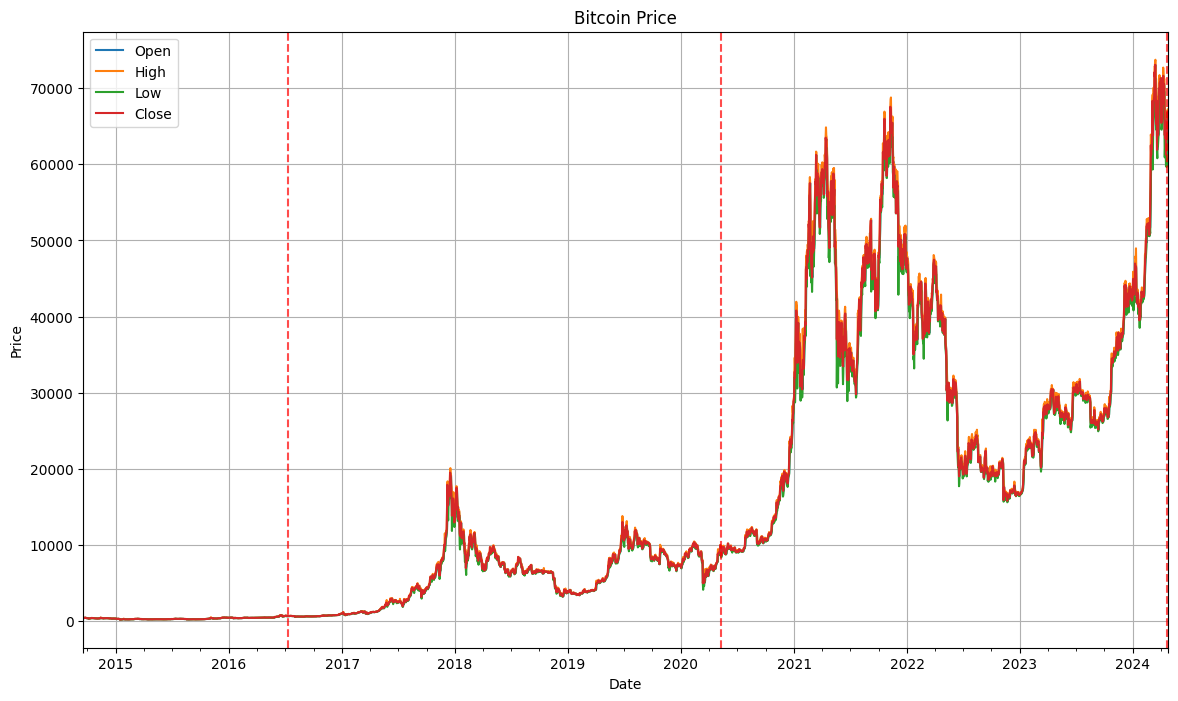

In [22]:
# Plot
df[['Open', 'High', 'Low', 'Close']].plot(figsize=(14, 8), title='Bitcoin Price')
plt.ylabel('Price')

# Add halving dates
halving_dates = ['2016-07-09', '2020-05-11', '2024-04-19']
for date in halving_dates:
    plt.axvline(x=date, color='r', linestyle='--', alpha=0.7)

# Display the plot
plt.xlabel('Date')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [53]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])

In [54]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## Visualization with candle sticks

In [27]:
# Create candlestick trace
candlestick = go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)

# Create figure and add candlestick trace
fig = go.Figure(data=[candlestick])

# Customize layout
fig.update_layout(
    title='BTC_data CandleStick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the figure
fig.show()

In [41]:
years = df['Date'].dt.year.unique()

# Iterate over each year and create candlestick chart
for year in years:
    df_year = df[df['Date'].dt.year == year]

    candlestick = go.Candlestick(
        x=df_year['Date'],
        open=df_year['Open'],
        high=df_year['High'],
        low=df_year['Low'],
        close=df_year['Close'],
        name='Candlestick'
    )

    fig = go.Figure(data=[candlestick])

    fig.update_layout(
        title=f'BTC_data Candlestick Chart for {year}',
        xaxis_title='Date',
        yaxis_title='Price',
        xaxis_rangeslider_visible=True
    )

    fig.update_xaxes(title_text='Time')

    fig.show()

In [46]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## Exploring ARIMA model

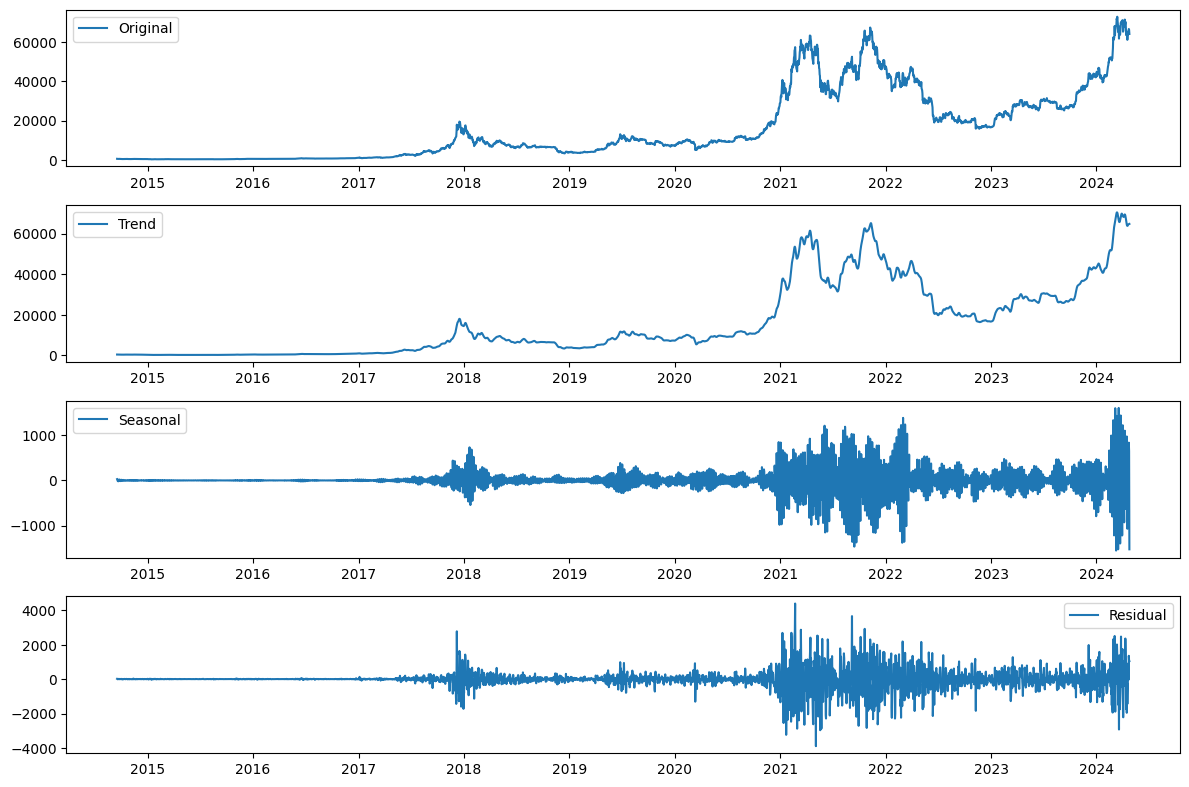

In [55]:
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
stl = STL(df['Close'], seasonal=9)

# Fit decomposition
result = stl.fit()

# Get trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



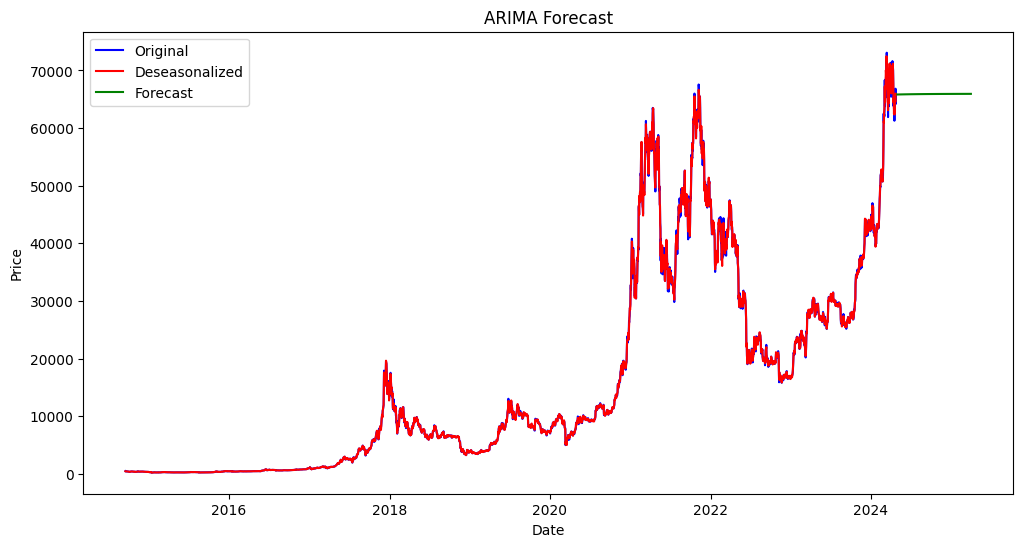

In [61]:
deseasonalized_series = trend + residual

# Fit ARIMA model
# ARIMA(p, d, q) - p: autoregressive order, d: differencing order, q: moving average order
arima_model = ARIMA(deseasonalized_series, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast future values
forecast_steps = 12
forecast_index = pd.date_range(start=deseasonalized_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original', color='blue')
plt.plot(deseasonalized_series, label='Deseasonalized', color='red')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()